<a href="https://colab.research.google.com/github/Mohit4Rajput/project1/blob/main/WRE_2022_GEV_calculation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install importlib-metadata==4.0.1
!pip install xarray==0.18.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 5.0.0
    Uninstalling importlib-metadata-5.0.0:
      Successfully uninstalled importlib-metadata-5.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.4.1 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 4.0.1 which is incompatible.
gym 0.25.2 requires importlib-metadata>=4.8.0; python_version < "3.10", but you have importlib-metadata 4.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 807 kB 6.6 MB/s 
  Attempting uninstall: xarray
    Found existing installation: xarray 0.20.2
    Uninstalling xarray-

In [ ]:
import os
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
  import skextremes as ske
  import netCDF4 as nc
except:
  !pip install git+https://github.com/kikocorreoso/scikit-extremes.git
  #!pip install git+https://github.com/OpenHydrology/lmoments3.git
  !pip install netCDF4
  import skextremes as ske
  import netCDF4 as nc
#import urllib
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kikocorreoso/scikit-extremes.git to /tmp/pip-req-build-s49xuvew
  Running command git clone -q https://github.com/kikocorreoso/scikit-extremes.git /tmp/pip-req-build-s49xuvew
     |████████████████████████████████| 99 kB 4.6 MB/s 
     |████████████████████████████████| 189 kB 43.6 MB/s 
  Created wheel for scikit-extremes: filename=scikit_extremes-0.0.1-py3-none-any.whl size=24642 sha256=e1b6525dc523f91997fc6840ad5beb20179fb07f29ebe9b628d8c461bbb8dd94
  Stored in directory: /tmp/pip-ephem-wheel-cache-evquz61o/wheels/87/59/0f/1c651166396ef04c2e366af5061f465026dfa3d054779b1a81
  Created wheel for algopy: filename=algopy-0.5.7-py3-none-any.whl size=107608 sha256=b4c3f3cac38f3a4615ce77a633fe88d51d1ec32bf4d8f15cd005bd0d061aa7e3
  Stored in directory: /root/.cache/pip/wheels/a8/fd/06/21dc6aba9f680fdbde386c06b1a8a1cf3d9a5f6bd96e31dcd4
Successfully built scikit-extre

ModuleNotFoundError: ignored

In [ ]:
xr.__version__

'0.20.2'

In [ ]:
# load data from github
!wget https://github.com/divyaupadhyay87/GEV_calculation/raw/main/observed_22_625_80_625.nc

--2022-10-14 09:58:50--  https://github.com/divyaupadhyay87/GEV_calculation/raw/main/observed_22_625_80_625.nc
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/divyaupadhyay87/GEV_calculation/main/observed_22_625_80_625.nc [following]
--2022-10-14 09:58:50--  https://raw.githubusercontent.com/divyaupadhyay87/GEV_calculation/main/observed_22_625_80_625.nc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117772 (115K) [application/octet-stream]
Saving to: ‘observed_22_625_80_625.nc’

observed_22_625_80_ 100%[===================>] 115.01K  --.-KB/s    in 0.02s   

2022-10-14 09:58:50 (5.40 MB/s) - ‘o

In [ ]:
# upload data from your computer
# from google.colab import files
# uploaded = files.upload()

In [ ]:
ds = xr.open_dataset('observed_22_625_80_625.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 6832)
Coordinates:
  * time     (time) datetime64[ns] 1950-06-01 1950-06-02 ... 2005-09-30
    lat      float64 ...
    lon      float64 ...
Data variables:
    pr       (time) float64 ...

In [ ]:
ds['pr']

<xarray.DataArray 'pr' (time: 6832)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 1950-06-01 1950-06-02 ... 2005-09-30
    lat      float64 22.62
    lon      float64 80.62
Attributes:
    units:    mm/Day

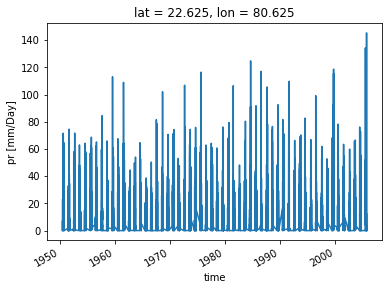

In [ ]:
ds['pr'].plot()

Text(0, 0.5, 'Precipitation level (mm/day)')

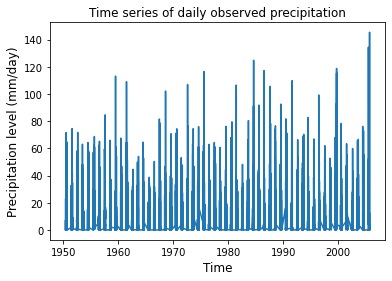

In [ ]:
# Plot daily precipitation data
plt.plot(ds['time'],ds['pr'])
plt.title('Time series of daily observed precipitation')
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Precipitation level (mm/day)", fontsize = 12)

Text(0, 0.5, 'Precipitation level (mm/day)')

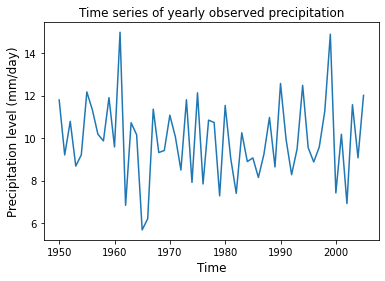

In [ ]:
# plot yearly mean precipitation
observation_yearly = []
for i in range(1950,2006):
    observation_yearly_1 = ds.sel(time=ds.time.dt.year.isin([i])).mean()
    observation_yearly_1 = observation_yearly_1['pr'].values
    observation_yearly.append(observation_yearly_1)
x = np.arange(1950, 2006, dtype=float)
plt.plot(x ,observation_yearly)
plt.title('Time series of yearly observed precipitation')
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Precipitation level (mm/day)", fontsize = 12)

Text(0, 0.5, 'Precipitation level (mm/day)')

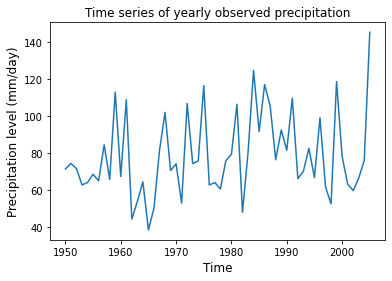

In [ ]:
# plot yearly max precipitation
observation_yearly = []
for i in range(1950,2006):
    observation_yearly_1 = ds.sel(time=ds.time.dt.year.isin([i])).max()
    observation_yearly_1 = observation_yearly_1['pr'].values
    observation_yearly.append(observation_yearly_1)
x = np.arange(1950, 2006, dtype=float)
plt.plot(x ,observation_yearly)
plt.title('Time series of yearly observed precipitation')
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Precipitation level (mm/day)", fontsize = 12)

Block-Maxima + Generalised Extreme Value (GEV) 

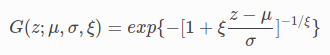

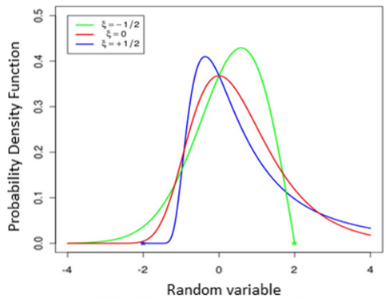

Parameters:
1. Location - μ (−∞<μ<∞), 
2. Scale - σ (σ>0) and 
3. shape - ξ (∞<ξ<∞) 

Depending on shape
1. ξ=0 - Gumbel distribution (type I). 
2. ξ>0 - Frêchet (type II) and
3. ξ<0 - the Weibull (type III)

In [ ]:
from scipy.stats import genextreme
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html

In [ ]:
maxima = ds.groupby('time.year').max('time')
max_list = maxima['pr'].values
print(max_list)

[ 71.59999943  74.57500076  71.72500038  62.99999928  64.25
  68.70000029  65.17500019  84.62499905  65.92500114 113.09999847
  67.52500057 109.02499962  44.54999971  54.05000019  64.62500048
  38.67499971  50.37499952  81.57500172 102.125       70.75000095
  74.34999943  53.10000038 106.92500019  74.50000095  75.92500019
 116.54999924  62.92499971  64.25        60.75        76.17499828
  79.47499943 106.52499962  48.20000076  80.42500114 124.80000305
  91.79999924 117.15000057 105.62499809  76.55000114  92.57499886
  81.67499828 109.80000114  66.32499981  70.3249979   82.75000095
  66.9000001   99.25        61.90000057  52.74999905 118.75
  78.32500076  63.42499924  59.89999962  66.59999943  76.17500114
 145.40000153]


In [ ]:
# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(max_list)
print(shape)
print(loc)
print(scale)

0.019317061549957538
68.7627283598855
17.87254256176997


## Return Period: It is defined as time interval after which a flood of given discharge equalled or exceeded. 
Return period (T) = 1/P

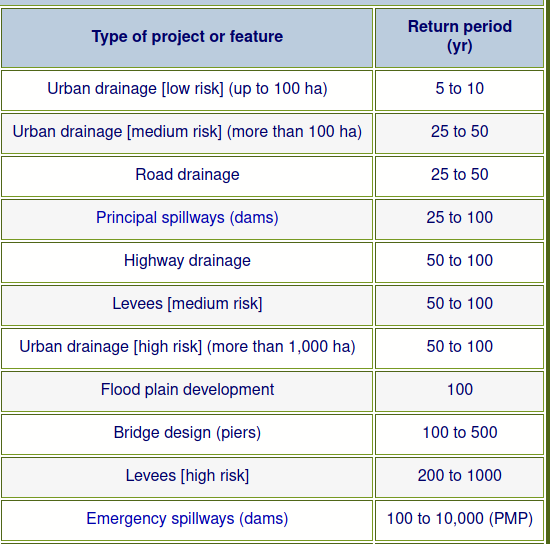

In [ ]:
# Compute the return levels for return period.
return_periods = 50
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)
print(return_levels)

135.93690072968778


In [ ]:
def return_level_calculation(max_list,return_periods):
    # Fit the generalized extreme value distribution to the data.
    shape, loc, scale = genextreme.fit(max_list)
    # Compute the return levels for several return periods.
    return_levels = genextreme.isf(1/return_periods, shape, loc, scale)
    return [return_levels]

In [ ]:
# rolling sum of two days
abc = ds.rolling(time=2, center=True).sum()
maxima3 = abc.groupby('time.year').max('time') ['pr'].values
return_levels= return_level_calculation(maxima3, 50)
print(return_levels)

[203.78387449830498]


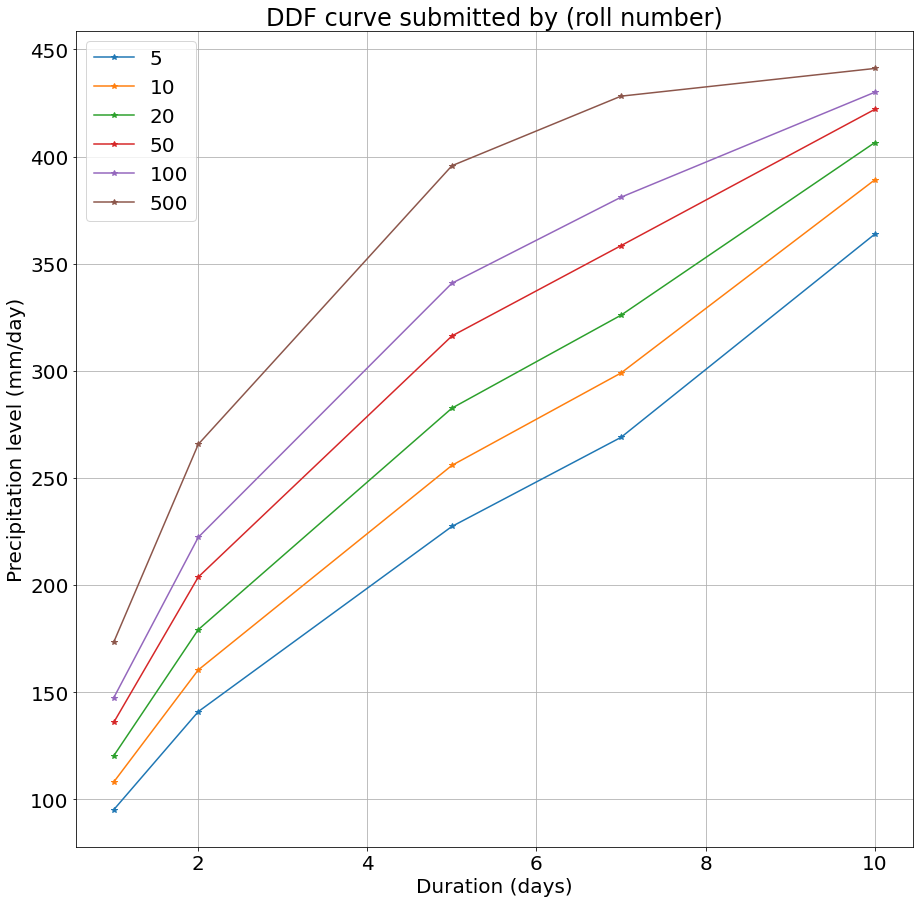

In [ ]:
max_list = []
maxday = [1,2,5,7,10]
return_periods = np.array([ 5, 10, 20, 50, 100,500])
plt.figure(figsize = (15,15))
plt.rcParams.update({'font.size':20})
for j, period1 in enumerate(return_periods):
    data1 =[]
    for k,daymax1 in enumerate(maxday):
        abc = ds.rolling(time=daymax1, center=True).sum()
        maxima3 = abc.groupby('time.year').max('time') ['pr'].values
        return_levels= return_level_calculation(maxima3, period1)
        #print(return_levels)
        data1.append(return_levels)
    plt.plot(maxday ,data1, label = f"{return_periods[j]}", marker = '*' )
    #max_list.append(maxima3)
plt.legend()
plt.grid()
plt.xlabel("Duration (days)")
plt.ylabel("Precipitation level (mm/day)")
plt.title('DDF curve submitted by (roll number)')
plt.savefig('DDF_curve_roll_number.png')

In [ ]:
# scikit-extremes library
maxima = ds.groupby('time.year').max('time')
max_list = maxima['pr'].values
model = ske.models.classic.GEV(max_list, fit_method = 'mle', ci = 0.05,
                              ci_method = 'delta')

/usr/local/lib/python3.7/dist-packages/skextremes/models/classic.py:527: RuntimeWarning: divide by zero encountered in log
  sT = -_np.log(1.-self.frec/T)
/usr/local/lib/python3.7/dist-packages/skextremes/models/classic.py:527: RuntimeWarning: invalid value encountered in log
  sT = -_np.log(1.-self.frec/T)
/usr/local/lib/python3.7/dist-packages/skextremes/models/classic.py:546: RuntimeWarning: invalid value encountered in double_scalars
  gradZ = [scale * (c**-2) * (1 - sT[i] ** (-c)) - scale * (c**-1) * (sT[i]**-c) * _np.log(sT[i]),


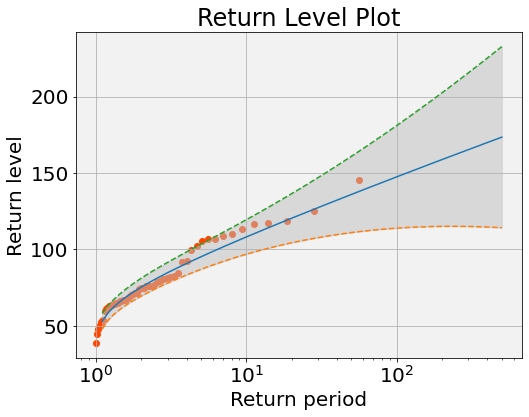

In [ ]:
model.plot_return_values()

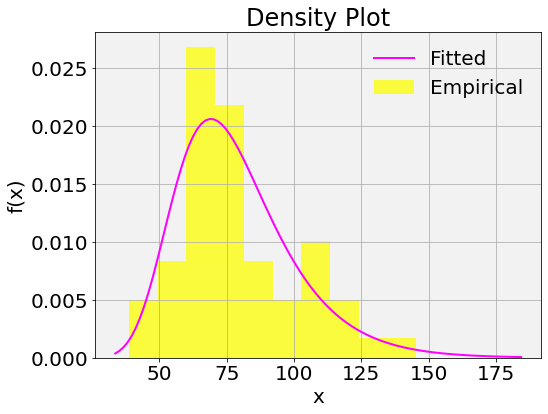

In [ ]:
model.plot_density()

In [ ]:
model.params

OrderedDict([('shape', 0.019315374088739734),
             ('location', 68.76271741591957),
             ('scale', 17.872508826852176)])

In [ ]:
# code for extracting the JJAS - 
# observation = ds.sel(time=ds.time.dt.month.isin([6,7,8,9]))